# Chapter 9

## Question 5

In which we compare an SVM with a non-linear kernel to logistic regression with non-linear feature transforms

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model
import sklearn.preprocessing
import sklearn.pipeline
import sklearn.svm 

sns.set(style="whitegrid")

### (a) Generate a data set with $n=500$ and $p=2$, such the the observations belong to two classes with a quadratic decision boundary.

In [2]:
X1 = np.random.uniform(low=-1, high=+1, size=500)
X2 = np.random.uniform(low=-1, high=+1, size=500)
Y = np.square(X1) - np.square(X2) + 0.5 * X2 > 0
df = pd.DataFrame({"X1": X1, "X2": X2, "Y": Y})


### (b) Plot the observations, coloured according to their class labels.

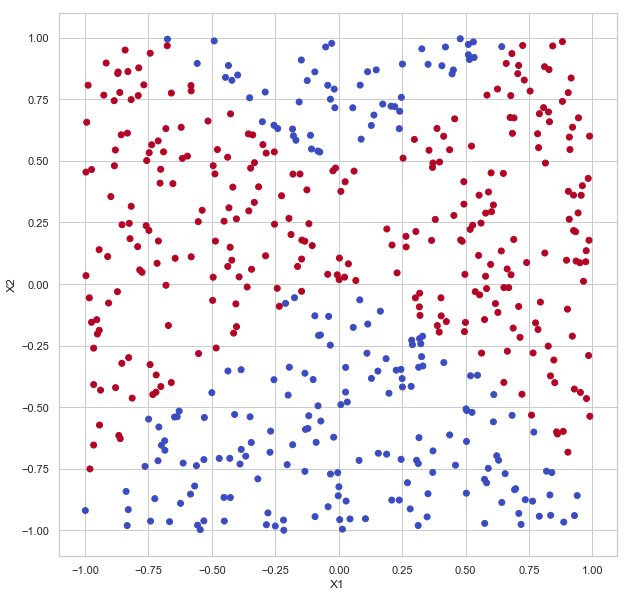

In [3]:
fig, ax = plt.subplots(figsize=(10,10))

scatter = ax.scatter("X1", "X2", c="Y", data=df, cmap=plt.cm.coolwarm)
ax.set_xlabel("X1")
ax.set_ylabel("X2")
plt.show()

### (c) Fit a logistic regression model on the data, using X1 and X2 as predictors

In [4]:
X = df.drop(columns="Y")
y = df.Y

logistic_model = sklearn.linear_model.LogisticRegressionCV(cv=5, max_iter=1e6)
logistic_model.fit(X,y)

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=1000000.0, multi_class='warn', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

### (d)Apply this model to the training data to get predicted class labels for each training observation. Plot the predicted class labels

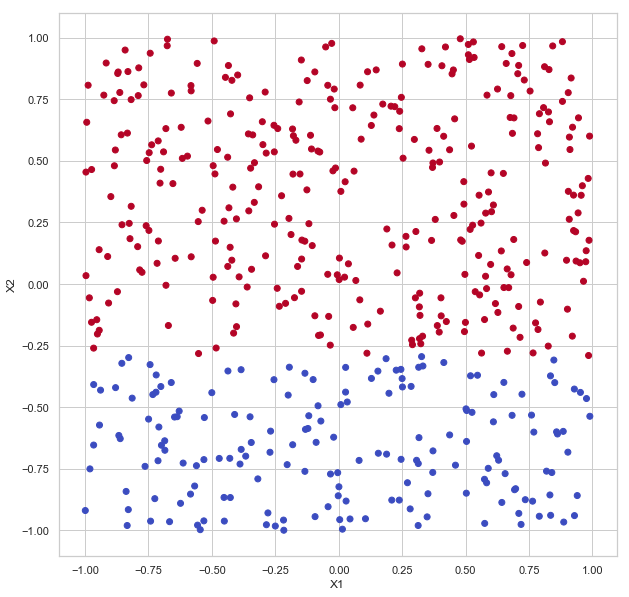

In [5]:
fig, ax = plt.subplots(figsize=(10,10))
y_pred = logistic_model.predict(X)
scatter = ax.scatter(X.X1, X.X2, c=y_pred, cmap=plt.cm.coolwarm)
ax.set_xlabel("X1")
ax.set_ylabel("X2")
plt.show()

### (e) Now fit a logistic regression model using non-linear functions of X1 and X2

In [6]:
non_linear_logistic = sklearn.pipeline.make_pipeline(sklearn.preprocessing.PolynomialFeatures(2),
                                                     sklearn.linear_model.LogisticRegressionCV())
non_linear_logistic.fit(X,y)

/home/will/.local/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('logisticregressioncv',
                 LogisticRegressionCV(Cs=10, class_weight=None, cv='warn',
                                      dual=False, fit_intercept=True,
                                      intercept_scaling=1.0, l1_ratios=None,
                                      max_iter=100, multi_class='warn',
                                      n_jobs=None, penalty='l2',
                                      random_state=None, refit=True,
                                      scoring=None, solver='lbfgs', tol=0.0001,
                                      verbose=0))],
         verbose=False)

### (f) Plot the predicted class labels for this model

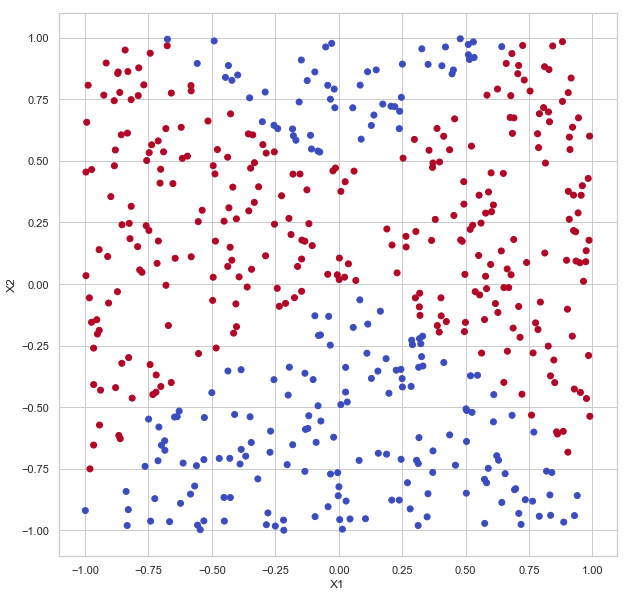

In [7]:
fig, ax = plt.subplots(figsize=(10,10))
y_pred = non_linear_logistic.predict(X)
scatter = ax.scatter(X.X1, X.X2, c=y_pred, cmap=plt.cm.coolwarm)
ax.set_xlabel("X1")
ax.set_ylabel("X2")
plt.show()

### (g) Fit an SVC (I.e. a linear SVM) to the data. Plot the predicted observations

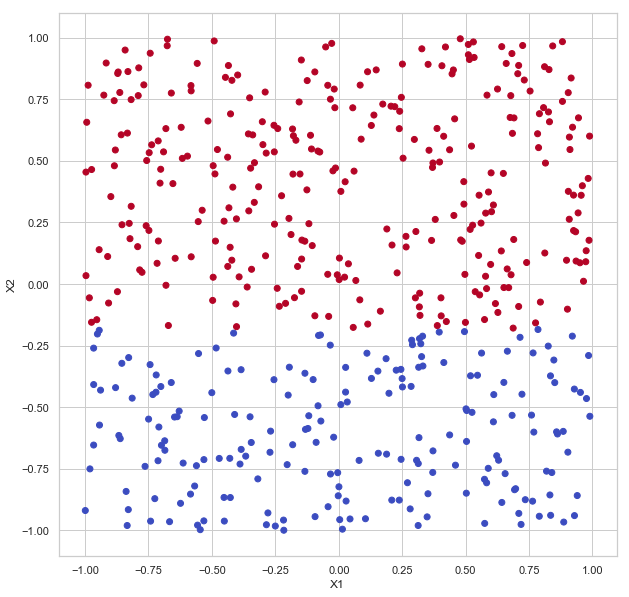

In [8]:
linear_svm = sklearn.svm.LinearSVC(max_iter=1e6)
linear_svm.fit(X, y)

fig, ax = plt.subplots(figsize=(10,10))
y_pred = linear_svm.predict(X)
scatter = ax.scatter(X.X1, X.X2, c=y_pred, cmap=plt.cm.coolwarm)
ax.set_xlabel("X1")
ax.set_ylabel("X2")
plt.show()

### (g) Fit an SVM using a non-linear kernel to the data, and plot the predicted observations

/home/will/.local/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


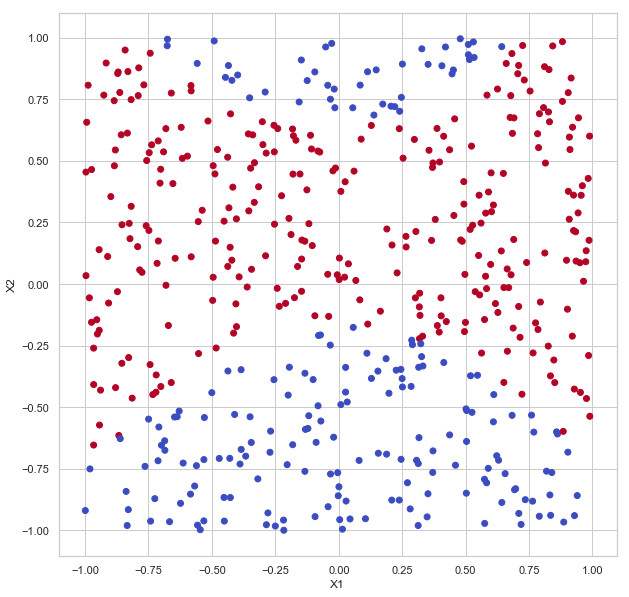

In [9]:
poly_svm = sklearn.svm.SVC(kernel="rbf", max_iter=1e6)
poly_svm.fit(X, y)

fig, ax = plt.subplots(figsize=(10,10))
y_pred = poly_svm.predict(X)
scatter = ax.scatter(X.X1, X.X2, c=y_pred, cmap=plt.cm.coolwarm)
ax.set_xlabel("X1")
ax.set_ylabel("X2")
plt.show()

### (i) Comment.

The results seem pretty indistinguishable!